In [22]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
import numpy as np
from mlxtend.plotting import heatmap
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
#pull the data
df = pd.read_csv('book_data_cleaned.csv')
df.drop(['isbn', 'publication_date'], axis=1, inplace=True)
df=df.rename(columns=lambda x: x.strip())
df=df.rename(columns = {'language_code':'language'})
df.to_csv('book_data_cleaned.csv', index=False)

In [24]:
df.head()

,bookID,title,authors,average_rating,isbn13,language,num_pages,ratings_count,text_reviews_count,publisher,publication_year,age
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,9780439785969,English,652,2095690,27591,Scholastic Inc.,2006,16
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,9780439358071,English,870,2153167,29221,Scholastic Inc.,2004,18
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,9780439554893,English,352,6333,244,Scholastic,2003,19
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,9780439655484,English,435,2339585,36325,Scholastic Inc.,2004,18
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,9780439682589,English,2690,41428,164,Scholastic,2004,18


In [25]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_year,age
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000,11123.000000,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099,2000.169019,21.830981
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589,8.247227,8.247227
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,1900.000000,2.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,1998.000000,17.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000,2003.000000,19.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000,2005.000000,24.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,2020.000000,122.000000


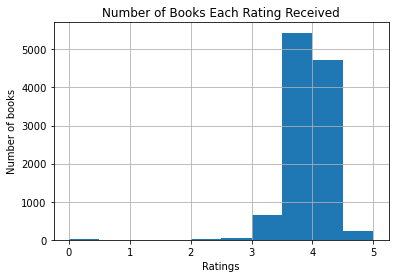

In [26]:
#Bar graphs
df.average_rating.hist()
plt.title("Number of Books Each Rating Received")
plt.xlabel("Ratings")
plt.ylabel("Number of books")
plt.savefig('images/ratings.png', dpi=300)
plt.show()

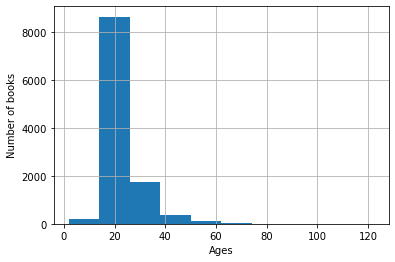

In [27]:
df.age.hist()
plt.xlabel("Ages")
plt.ylabel("Number of books")
plt.savefig('images/ages.png', dpi=300)
plt.show()

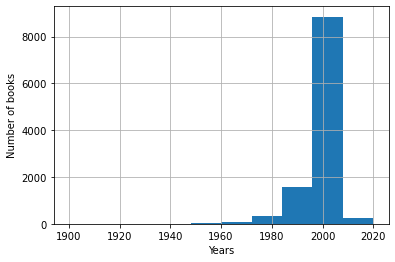

In [28]:
df.publication_year.hist()
plt.xlabel("Years")
plt.ylabel("Number of books")
plt.savefig('images/publication.png', dpi=300)
plt.show()

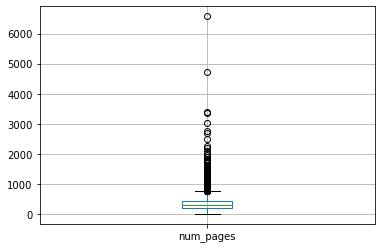

In [29]:
#Box plots
df.boxplot(column='num_pages')
plt.savefig('images/num_pages.png', dpi=300)
plt.show()

In [30]:
#remove the outliers
df=df.drop(df.index[df['num_pages'] >=1000])
df.to_csv('book_data_cleaned.csv', index=False)

In [31]:
df.corr()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_year,age
bookID,1.000000,-0.031375,-0.002051,-0.012141,-0.076384,-0.080472,0.026486,-0.026486
average_rating,-0.031375,1.000000,0.000291,0.102496,0.038961,0.035334,-0.029605,0.029605
isbn13,-0.002051,0.000291,1.000000,0.008458,0.006942,0.008911,0.000161,-0.000161
num_pages,-0.012141,0.102496,0.008458,1.000000,0.046999,0.054281,-0.001510,0.001510
ratings_count,-0.076384,0.038961,0.006942,0.046999,1.000000,0.865418,0.044662,-0.044662
text_reviews_count,-0.080472,0.035334,0.008911,0.054281,0.865418,1.000000,0.067172,-0.067172
publication_year,0.026486,-0.029605,0.000161,-0.001510,0.044662,0.067172,1.000000,-1.000000
age,-0.026486,0.029605,-0.000161,0.001510,-0.044662,-0.067172,-1.000000,1.000000


In [33]:
cols=['bookID', 'average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_year', 'age']

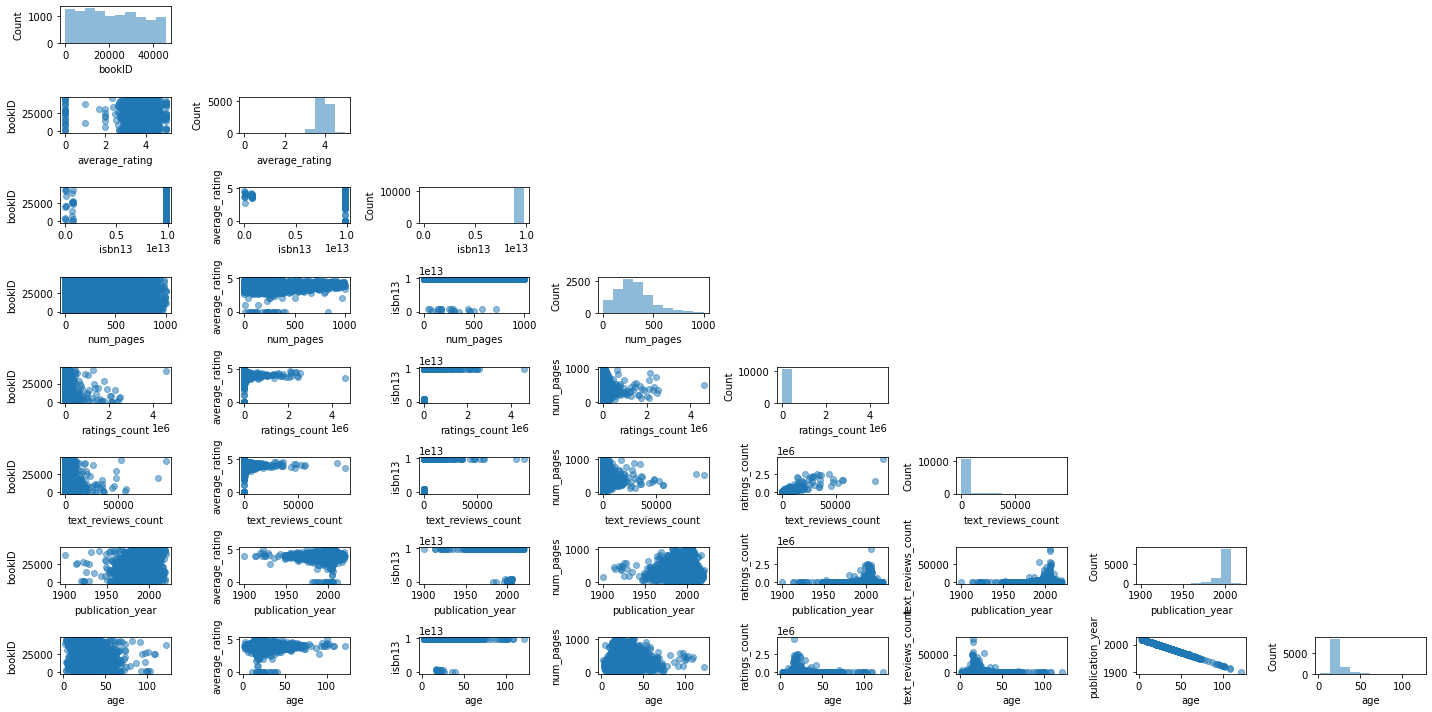

In [34]:
#scatter plot
scatterplotmatrix(df[cols].values, figsize=(20, 10), 
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.savefig('images/scatterplot.png', dpi=300)
plt.show()

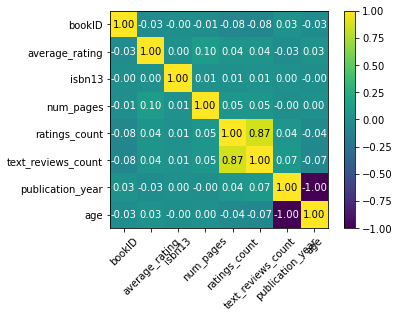

In [35]:
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

plt.savefig('images/coef.png', dpi=300)
plt.show()

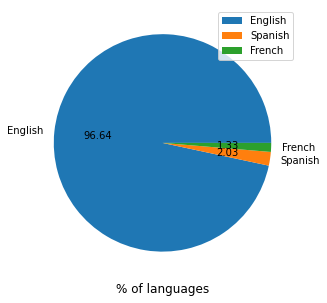

In [36]:
#Categorical columns
#Pie chart
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.language.value_counts().head(3).plot(kind='pie',label='', autopct='%.2f', ax=ax1, ).legend()
ax1.set_xlabel('% of languages', size=12)
plt.savefig('images/languages_piechart.png', dpi=300)
plt.show()

In [37]:
#Pivot tables
pd.pivot_table(df, index= 'language', values='average_rating').sort_values(by='average_rating',ascending=False).head(10)

,average_rating
language,
Welsh,5.000000
Gaelic,4.470000
Chinese,4.456429
Turkish,4.420000
Aleut,4.360000
Latin,4.353333
Japanese,4.268696
Russian,4.255000
Dutch,4.180000


In [38]:
pd.pivot_table(df, index = ['authors','title','language'], values = 'average_rating').sort_values('average_rating', ascending = False).head(10)



average_rating
authors                                            title                                              language                
Laura Driscoll/Alisa Klayman-Grodsky/Eric     W... Tyrannosaurus Wrecks (Stanley  #1)                 English              5.0
John  Diamond                                      The Diamond Color Meditation: Color Pathway to ... English              5.0
Todd Davis/Marc Frey                               The New Big Book of America                        English              5.0
Middlesex Borough Heritage Committee               Middlesex Borough (Images of America: New Jersey)  English              5.0
NOT A BOOK                                         The Goon Show  Volume 11: He's Fallen in the Wa... English              5.0
                                                   The Goon Show  Volume 4: My Knees Have Fallen Off! English              5.0
Dennis Adler/R.L. Wilson                           Winchester Shotguns                                English              5.0
Chris    Green/Chris Wright/Paul Douglas Gardner   Fanning the Flame: Bible  Cross  and Mission       English              5.0
Ross Garnaut                                       Taxation of Mineral Rents                          English              5.0
Tara MacCarthy                                     Literature Circle Guide: Bridge to Terabithia: ... English              5.0

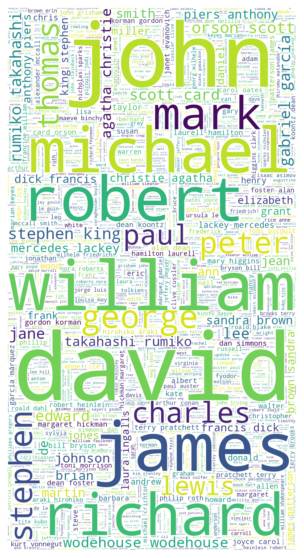

In [39]:
words = " ".join(df['authors'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.savefig('images/wordcloud.png', dpi=300)
plt.show()

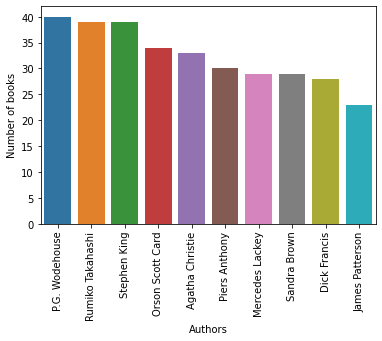

In [42]:
#barplots
chart = sns.barplot(x=df.authors.value_counts().head(10).index, y=df.authors.value_counts().head(10))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Authors")
plt.ylabel("Number of books")
plt.savefig('images/top_10_authors.png', dpi=300)
plt.show()

/Users/cerenkasap/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1987'),
  Text(1, 0, '1989'),
  Text(2, 0, '1990'),
  Text(3, 0, '1991'),
  Text(4, 0, '1992'),
  Text(5, 0, '1993'),
  Text(6, 0, '1994'),
  Text(7, 0, '1995'),
  Text(8, 0, '1996'),
  Text(9, 0, '1997'),
  Text(10, 0, '1998'),
  Text(11, 0, '1999'),
  Text(12, 0, '2000'),
  Text(13, 0, '2001'),
  Text(14, 0, '2002'),
  Text(15, 0, '2003'),
  Text(16, 0, '2004'),
  Text(17, 0, '2005'),
  Text(18, 0, '2006'),
  Text(19, 0, '2007')])

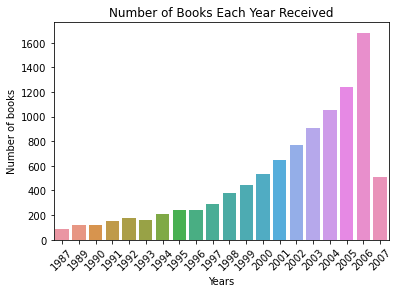

In [45]:
sns.barplot(df['publication_year'].value_counts().head(20).index, df['publication_year'].value_counts().head(20))
plt.title('Number of Books Each Year Received')
plt.xlabel('Years')
plt.ylabel('Number of books')
plt.savefig('images/number_of_books.png', dpi=300)
plt.xticks(rotation=45)

